# **COVID-19 Public Health Authority (PHU) cases Analysis**

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

#### **Import, analyze, clean, and preprocess a “real-world” classification dataset.**

In [3]:
# Import our input dataset
df = pd.read_csv('./Resources/Ontario.csv')
df.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-03-07,2020-03-09,2020-03-11,2020-03-09,50s,MALE,Travel,Resolved,NaN,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
1,2,2020-03-02,2020-03-09,2020-03-09,2020-03-09,40s,MALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2,3,2020-03-06,2020-03-10,2020-03-10,2020-03-09,30s,FEMALE,Travel,Resolved,NaN,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
3,4,2020-03-02,2020-03-09,2020-03-12,2020-03-07,40s,MALE,Travel,Resolved,NaN,Ottawa Public Health,100 Constellation Drive,Ottawa,K2G 6J8,www.ottawapublichealth.ca,45.345665,-75.763912
4,5,2020-03-03,2020-03-10,2020-03-11,2020-03-09,30s,MALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


#### **Inspect Data**

In [4]:
# show number of columns and rows
df.shape

(36178, 17)

In [5]:
# show DF Columns
df.columns

Index(['Row_ID', 'Accurate_Episode_Date', 'Case_Reported_Date',
       'Test_Reported_Date', 'Specimen_Date', 'Age_Group', 'Client_Gender',
       'Case_AcquisitionInfo', 'Outcome1', 'Outbreak_Related', 'Reporting_PHU',
       'Reporting_PHU_Address', 'Reporting_PHU_City',
       'Reporting_PHU_Postal_Code', 'Reporting_PHU_Website',
       'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude'],
      dtype='object')

In [6]:
# Return data types
df.dtypes

Row_ID                         int64
Accurate_Episode_Date         object
Case_Reported_Date            object
Test_Reported_Date            object
Specimen_Date                 object
Age_Group                     object
Client_Gender                 object
Case_AcquisitionInfo          object
Outcome1                      object
Outbreak_Related              object
Reporting_PHU                 object
Reporting_PHU_Address         object
Reporting_PHU_City            object
Reporting_PHU_Postal_Code     object
Reporting_PHU_Website         object
Reporting_PHU_Latitude       float64
Reporting_PHU_Longitude      float64
dtype: object

#### **Clean Data**

In [7]:
# Return columns with Null values 
for column in df.columns:
    print(f"Column {column} has {df[column].isnull().sum()} null values")

Column Row_ID has 0 null values
Column Accurate_Episode_Date has 2 null values
Column Case_Reported_Date has 0 null values
Column Test_Reported_Date has 424 null values
Column Specimen_Date has 304 null values
Column Age_Group has 0 null values
Column Client_Gender has 0 null values
Column Case_AcquisitionInfo has 0 null values
Column Outcome1 has 0 null values
Column Outbreak_Related has 21732 null values
Column Reporting_PHU has 0 null values
Column Reporting_PHU_Address has 0 null values
Column Reporting_PHU_City has 0 null values
Column Reporting_PHU_Postal_Code has 0 null values
Column Reporting_PHU_Website has 0 null values
Column Reporting_PHU_Latitude has 0 null values
Column Reporting_PHU_Longitude has 0 null values


In [8]:
# Retrun df duplicates
print(f"Duplicate entries: {df.duplicated().sum()}")

Duplicate entries: 0


### **Aggregate data by Accurate_Episode_date**

In [9]:
df \
.groupby(["Accurate_Episode_Date"]) \
.count()

,Row_ID,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
Accurate_Episode_Date,,,,,,,,,,,,,,,,
2020-01-01,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2
2020-01-10,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
2020-01-21,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
2020-01-22,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
2020-01-24,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-03,74,74,72,72,74,74,74,74,7,74,74,74,74,74,74,74
2020-07-04,52,52,52,52,52,52,52,52,1,52,52,52,52,52,52,52
2020-07-05,54,54,53,53,54,54,54,54,0,54,54,54,54,54,54,54


### **Filter data by Public Health Units (PHU)**

In [10]:
data_df = df \
.groupby(["Reporting_PHU", "Reporting_PHU_Latitude", "Reporting_PHU_Longitude"]) \
.count()["Row_ID"] \
.reset_index() \
.rename(columns={"Row_ID" : "Cases"})

data_df["OnsetWithin"] = "current day"

data_df

,Reporting_PHU,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Cases,OnsetWithin
0,Algoma Public Health Unit,46.532373,-84.314836,24,current day
1,Brant County Health Unit,43.151811,-80.274374,133,current day
2,Chatham-Kent Health Unit,42.403861,-82.208561,162,current day
3,Durham Region Health Department,43.898605,-78.940341,1724,current day
4,Eastern Ontario Health Unit,45.029152,-74.736298,166,current day
5,Grey Bruce Health Unit,44.576196,-80.940980,107,current day
6,Haldimand-Norfolk Health Unit,42.847825,-80.303815,431,current day
7,"Haliburton, Kawartha, Pine Ridge District Heal...",43.968173,-78.285792,201,current day
8,Halton Region Health Department,43.413997,-79.744796,781,current day
9,Hamilton Public Health Services,43.257631,-79.871341,847,current day


#### **Gather Dateframe information**
- Display dataframe
- Display Categorical Variable list ('float64')
- Display Column unique values 

In [12]:
# Display Dataframe
df.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-03-07,2020-03-09,2020-03-11,2020-03-09,50s,MALE,Travel,Resolved,NaN,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
1,2,2020-03-02,2020-03-09,2020-03-09,2020-03-09,40s,MALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
2,3,2020-03-06,2020-03-10,2020-03-10,2020-03-09,30s,FEMALE,Travel,Resolved,NaN,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
3,4,2020-03-02,2020-03-09,2020-03-12,2020-03-07,40s,MALE,Travel,Resolved,NaN,Ottawa Public Health,100 Constellation Drive,Ottawa,K2G 6J8,www.ottawapublichealth.ca,45.345665,-75.763912
4,5,2020-03-03,2020-03-10,2020-03-11,2020-03-09,30s,MALE,Travel,Resolved,NaN,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


#### **Display Variable List**

In [13]:
# Categorical variable list
df_cat = df.dtypes[df.dtypes == "float64"].index.tolist()
df_cat

['Reporting_PHU_Latitude', 'Reporting_PHU_Longitude']

In [14]:
# Unique numbers
df[df_cat].nunique()

Reporting_PHU_Latitude     34
Reporting_PHU_Longitude    34
dtype: int64

### **Categorical Variables using one-hot encoding** 
- One-hot encoding identifies all unique column values and splits the single categorical column into a series of columns, each containing information about a single unique categorical value
- Although one-hot encoding is a very robust solution, it can be very memory-intensive. Therefore, categorical variables with a large number of unique values might become difficult to navigate or filter once encoded.

### **Bucketing or binning**
**The process of reducing the number of unique categorical values in a dataset is known as bucketing or binning**
- Bucketing data typically follows one of two approaches:
- 1) Collapse all of the infrequent and rare categorical values into a single “other” category.
- 2) Create generalized categorical values and reassign all data points to the new corresponding values

In [15]:
# Application type counts
Reporting_PHU_counts = df.Reporting_PHU.value_counts()
Reporting_PHU_counts

Toronto Public Health                                       13511
Peel Public Health                                           6027
York Region Public Health Services                           3082
Ottawa Public Health                                         2123
Durham Region Health Department                              1724
Windsor-Essex County Health Unit                             1675
Region of Waterloo, Public Health                            1313
Hamilton Public Health Services                               847
Halton Region Health Department                               781
Niagara Region Public Health Department                       763
Middlesex-London Health Unit                                  631
Simcoe Muskoka District Health Unit                           607
Wellington-Dufferin-Guelph Public Health                      493
Haldimand-Norfolk Health Unit                                 431
Leeds, Grenville and Lanark District Health Unit              354
Lambton Pu

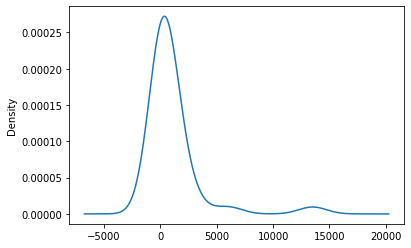

In [17]:
# Visualize the value counts
Reporting_PHU_counts.plot.density()

The **Reporting_PHU** columns variables appear a lot in of dataset, they are a feature of our model

#### **Tasks**
According to the density plot, the most common unique values have more than 1000 instances within the dataset. Therefore, we can bucket any occurence that appears fewer than 1000 times in the dataset as “other.” To do this, we’ll use a Python for loop and Pandas’ replace method. 
- Determine which values to replace
- Replace in DataFrame
- Check to make sure binning was successful

In [21]:
# replace values
replace_Reporting_PHU = list(Reporting_PHU_counts[Reporting_PHU_counts < 1000].index)

# use for loop to replace values
for i in replace_Reporting_PHU:
    df.Reporting_PHU  = df.Reporting_PHU.replace(i,"Other")

# Bucketing sucess
df.Reporting_PHU .value_counts()

Toronto Public Health                 13511
Other                                  6723
Peel Public Health                     6027
York Region Public Health Services     3082
Ottawa Public Health                   2123
Durham Region Health Department        1724
Windsor-Essex County Health Unit       1675
Region of Waterloo, Public Health      1313
Name: Reporting_PHU, dtype: int64

#### **Tasks**
Now that we have reduced the number of unique values in the country variable, we’re ready to transpose the variable using one-hot encoding. The easiest way to perform **one-hot encoding** in Python is to use Scikit-learn’s **OneHotEncoder** module on the country variable. To build the encoded columns, we must **create an instance** of OneHotEncoder and **“fit”** the encoder with our values.

In [90]:
# Create the OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
PHU_df = pd.DataFrame(enc.fit_transform(df.Reporting_PHU.values.reshape(-1,1)))

# Rename encoded columns
PHU_df.columns = enc.get_feature_names(['Reporting_PHU'])
PHU_df.head()

,Reporting_PHU_Durham Region Health Department,Reporting_PHU_Other,Reporting_PHU_Ottawa Public Health,Reporting_PHU_Peel Public Health,"Reporting_PHU_Region of Waterloo, Public Health",Reporting_PHU_Toronto Public Health,Reporting_PHU_Windsor-Essex County Health Unit,Reporting_PHU_York Region Public Health Services
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [58]:
# Merge the two DataFrames,drop  Reporting_PHU column
# PHU_df = df.merge(encode_df,left_index=True,right_index=True).drop("Reporting_PHU",axis=1)

#### **Dataframe information**
- dataframe data type
- variable list
- column unique values

In [93]:
PHU_df.dtypes

Reporting_PHU_Durham Region Health Department       float64
Reporting_PHU_Other                                 float64
Reporting_PHU_Ottawa Public Health                  float64
Reporting_PHU_Peel Public Health                    float64
Reporting_PHU_Region of Waterloo, Public Health     float64
Reporting_PHU_Toronto Public Health                 float64
Reporting_PHU_Windsor-Essex County Health Unit      float64
Reporting_PHU_York Region Public Health Services    float64
dtype: object

In [94]:
# Categorical variable list
df_cat = PHU_df.dtypes[PHU_df.dtypes == "float64"].index.tolist()
df_cat

['Reporting_PHU_Durham Region Health Department',
 'Reporting_PHU_Other',
 'Reporting_PHU_Ottawa Public Health',
 'Reporting_PHU_Peel Public Health',
 'Reporting_PHU_Region of Waterloo, Public Health',
 'Reporting_PHU_Toronto Public Health',
 'Reporting_PHU_Windsor-Essex County Health Unit',
 'Reporting_PHU_York Region Public Health Services']

In [95]:
# Unique numbers, must be < 10
PHU_df[df_cat].nunique()

Reporting_PHU_Durham Region Health Department       2
Reporting_PHU_Other                                 2
Reporting_PHU_Ottawa Public Health                  2
Reporting_PHU_Peel Public Health                    2
Reporting_PHU_Region of Waterloo, Public Health     2
Reporting_PHU_Toronto Public Health                 2
Reporting_PHU_Windsor-Essex County Health Unit      2
Reporting_PHU_York Region Public Health Services    2
dtype: int64

#### **Split our training and testing data**
- We need to split our training and testing data before fitting our **StandardScaler instance**. This prevents testing data from influencing the standardization function.
- To build our training and testing datasets, we need to separate two values:
- input values (which are our independent variables commonly referred to as model features or “X” in TensorFlow documentation (Links to an external site.))
- target output (our dependent variable commonly referred to as target or “y” in TensorFlow documentation)

- **Use Sklearn train_test_split method to split data into training and test**
    - X_train, X_test, y_train, y_test 
- **Prepare dataset for neural network model**
    - Normalize or standardize our numerical variables

In [96]:
# Split our preprocessed data into our features and target arrays
y = PHU_df["Reporting_PHU_Ottawa Public Health"].values
X = PHU_df.drop(["Reporting_PHU_Ottawa Public Health","Reporting_PHU_Other"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

- **To apply our standardization, we need to create a StandardScaler instance by adding and running the following code:**
- **Once we have our StandardScalerinstance, we need to fit the input data by adding and running the next line of code:**
    - Create StandardScaler instance
    - fit the StandardScaler
    - Scale the data**

In [97]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### **Tasks**
At last, our data is preprocessed and separated and ready for modelling. For our purposes, we will use the same framework we used for our basic neural network:
- For our input layer, we must add the number of input features equal to the number of variables in our feature DataFrame.
- In our hidden layers, our deep learning model structure will be slightly different—we’ll add two hidden layers with only a few neurons in each layer. To create the second hidden layer, we’ll add another Keras Dense class while defining our model. All of our hidden layers will use the relu activation function to identify nonlinear characteristics from the input values.
- In the output layer, we’ll use the same parameters from our basic neural network including the sigmoid activation function. The sigmoid activation function will help us predict the probability that an employee is at risk for attrition.

#### **Define Model**
- Deep neural net
- First hidden layer
- Second hidden layer
- Output layer
- Check the structure of the model

In [98]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


Now it is time to compile our model and define the loss and accuracy metrics. Since we want to use our model as a binary classifier, we’ll use the **binary_crossentropy loss function**, **adam optimizer**, and **accuracy metrics**, which are the same parameters we used for our basic neural network. To compile the model, add and run the following code:

#### **Compile neural network**
- Use **adam optimizer**, which uses a gradient descent approach to ensure that the algorithm will not get stuck on weaker classifying variables and feature
- The **loss metric** is used by machine learning algorithms to score the performance of the model through each iteration and **epoch** by evaluating the inaccuracy of a single input.
- Use **binary_crossentropy**, which is specifically designed to evaluate a binary classification mode

In [99]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

#### **Train Model**
Training and evaluating the deep learning model is no different from a basic neural network. Depending on the complexity of the dataset, we may opt to increase the number of epochs to allow for the deep learning model more opportunities to optimize the weight coefficients. To train our model, we must add and run the following code:

In [100]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100) #epochs (run through the data)

Epoch 1/100
848/848 [==============================] - 1s 1ms/step - loss: 0.2222 - accuracy: 0.9372
Epoch 2/100
848/848 [==============================] - 1s 1ms/step - loss: 0.1378 - accuracy: 0.9421
Epoch 3/100
848/848 [==============================] - 1s 1ms/step - loss: 0.1342 - accuracy: 0.9421
Epoch 4/100
848/848 [==============================] - 1s 1ms/step - loss: 0.1337 - accuracy: 0.9421
Epoch 5/100
848/848 [==============================] - 1s 1ms/step - loss: 0.1335 - accuracy: 0.9421
Epoch 6/100
848/848 [==============================] - 1s 1ms/step - loss: 0.1334 - accuracy: 0.9421
Epoch 7/100
848/848 [==============================] - 1s 1ms/step - loss: 0.1334 - accuracy: 0.9421
Epoch 8/100
848/848 [==============================] - 1s 1ms/step - loss: 0.1333 - accuracy: 0.9421
Epoch 9/100
848/848 [==============================] - 1s 1ms/step - loss: 0.1333 - accuracy: 0.9421
Epoch 10/100
848/848 [==============================] - 1s 1ms/step - loss: 0.1334 - accura

In [101]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

283/283 - 0s - loss: 0.1394 - accuracy: 0.9390
Loss: 0.1394200176000595, Accuracy: 0.9389718174934387


#### **Summary**

Looking at the performance metrics from the model, the neural network was able to correctly classify each of the points in the test data. In other words, the model was able to correctly classify data it was not trained on **94%** of the time. Although perfect model performance is ideal, more complex datasets and models may not be able to achieve 100% accuracy. Therefore, it is important to establish model performance thresholds before designing any machine learning mode. As seen from the results of the **Deep Learning** model metrics, the observation made was that the model correctly identified **Ontario Public Health Autority** data to be **94%** of the time

- **Create a Keras Sequentail model(add layers) for our new neural network model**
    - The **nn_model** object will store the entire architecture of our neural network model
    - Add layers to our Sequential model using **Keras Dense class**
- **Compile Neural Network**

In [103]:
# Define model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


**The summary returned the number of weight parameters for each layer which equals to the number of input valuse by the number of neurons**

In [104]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 107
Trainable params: 107
Non-trainable params: 0
_________________________________________________________________


In [106]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [109]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=200)

Epoch 1/200
848/848 [==============================] - 1s 1ms/step - loss: 0.1333 - accuracy: 0.9421
Epoch 2/200
848/848 [==============================] - 1s 1ms/step - loss: 0.1332 - accuracy: 0.9421
Epoch 3/200
848/848 [==============================] - 1s 1ms/step - loss: 0.1333 - accuracy: 0.9421
Epoch 4/200
848/848 [==============================] - 1s 1ms/step - loss: 0.1333 - accuracy: 0.9421
Epoch 5/200
848/848 [==============================] - 1s 1ms/step - loss: 0.1333 - accuracy: 0.9421
Epoch 6/200
848/848 [==============================] - 1s 1ms/step - loss: 0.1333 - accuracy: 0.9421
Epoch 7/200
848/848 [==============================] - 1s 1ms/step - loss: 0.1332 - accuracy: 0.9421
Epoch 8/200
848/848 [==============================] - 1s 1ms/step - loss: 0.1333 - accuracy: 0.9421
Epoch 9/200
848/848 [==============================] - 1s 1ms/step - loss: 0.1333 - accuracy: 0.9421
Epoch 10/200
848/848 [==============================] - 1s 1ms/step - loss: 0.1333 - accura

In [108]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

283/283 - 0s - loss: 0.1394 - accuracy: 0.9390
Loss: 0.13941359519958496, Accuracy: 0.9389718174934387


After adding more epochs (200) and running it again; the deep learning model's performance metrics indicated that the model returned the same results as the first one

### **Plot PHU Hotspots in Ontario Canada**

In [102]:
from plotly.offline import plot
import plotly.graph_objs as go
fig = px.scatter_mapbox(data_df, lat="Reporting_PHU_Latitude", lon="Reporting_PHU_Longitude",  
            color="OnsetWithin", 
            color_discrete_sequence=["red", "darkblue", "yellow", "white"], 
            size="Cases", hover_name="Reporting_PHU", 
            size_max=28, zoom=5.4, 
            center=dict(lat=45,lon=-79.4), 
            height=800, 
            labels={"OnsetWithin" : "Onset w/in Date"},
            title=" Confirmed Cases per Public Health Unit" )
fig.update_layout(mapbox_style="open-street-map")
fig.show()
plot(fig, auto_open=True)

'temp-plot.html'